# Análise dos Dados do Airbnb - Sua Cidade

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-09-22/visualisations/listings.csv')

# Exibindo as 5 primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,279,5,301,2023-09-11,1.87,1,265,25,NaN
1,25026,Rental unit in Rio de Janeiro · ★4.71 · 1 bedr...,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,330,2,272,2023-09-07,1.68,1,203,24,NaN
2,35764,Loft in Rio de Janeiro · ★4.90 · 1 bedroom · 1...,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,192,3,446,2023-09-11,2.82,1,46,37,NaN
3,48305,Rental unit in Ipanema · ★4.74 · 6 bedrooms · ...,70933,Goitaca,NaN,Ipanema,-22.98591,-43.20302,Entire home/apt,3448,2,152,2023-09-10,0.99,9,306,30,NaN
4,48901,Rental unit in Rio · ★4.37 · 4 bedrooms · 5 be...,222884,Marcio,NaN,Copacabana,-22.96574,-43.17514,Entire home/apt,703,3,20,2023-09-10,0.20,1,307,12,NaN


## Análise dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [8]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,68997,Matthias,NaN,Copacabana,-22.96599,-43.1794,Entire home/apt,279,5,301,2023-09-11,1.87,1,265,25,NaN


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Tecnologia de rastreamento de tráfego pago
* `license` - Licença

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb.

In [12]:
# identificar o volume de dados do DataFrame
print(f'Entradas \t{df.shape[0]}')
print(f'Variáveis \t{df.shape[1]}')

# Exibindo os tipos dos dados
display(df.dtypes)

Entradas 	31964
Variáveis 	18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.254661
last_review                       0.254661
host_name                         0.000094
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**
Para identificar a distribuição das variáveis, irei plotar o histograma.

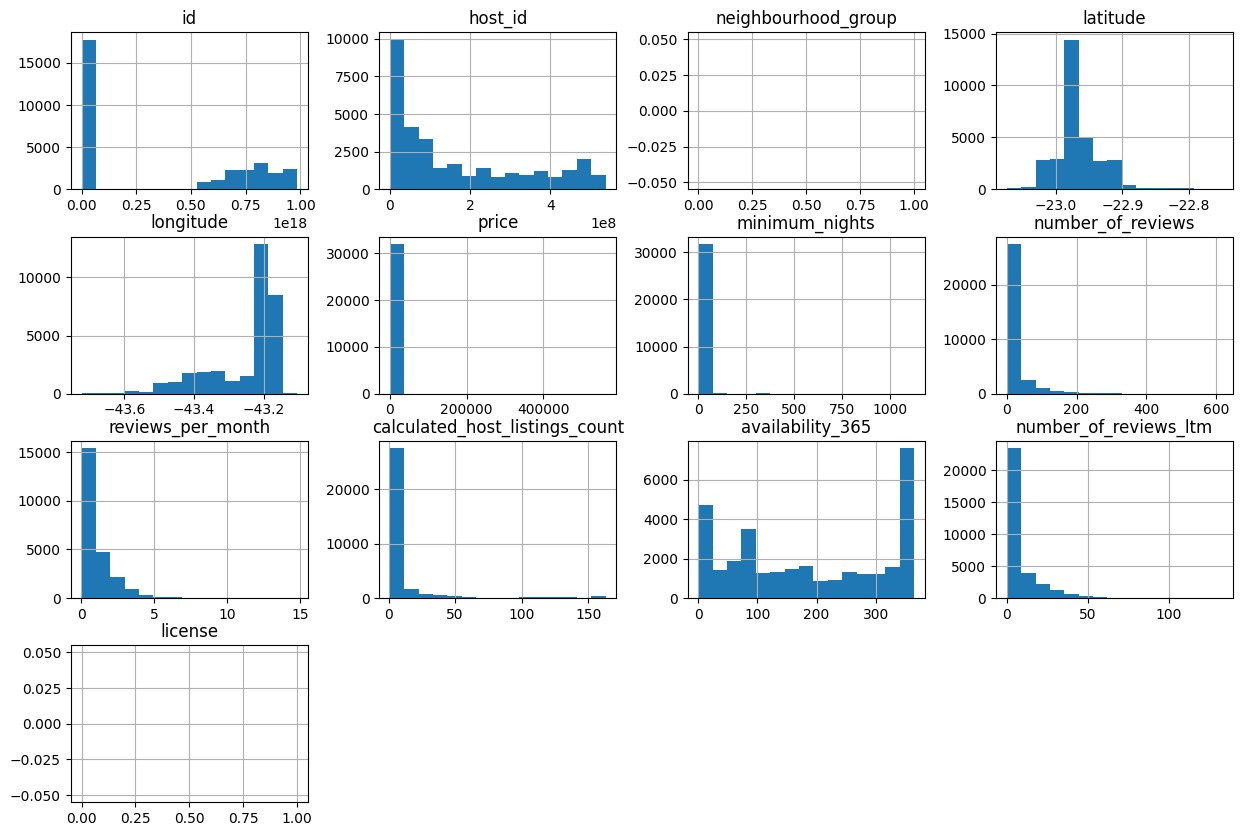

In [17]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**
* A média da coluna `price` é de 819 R$

In [18]:
# ver a média da coluna `price``
df['price'].mean()

819.91302715555

### **Q4. Qual a correlação existente entre as variáveis**

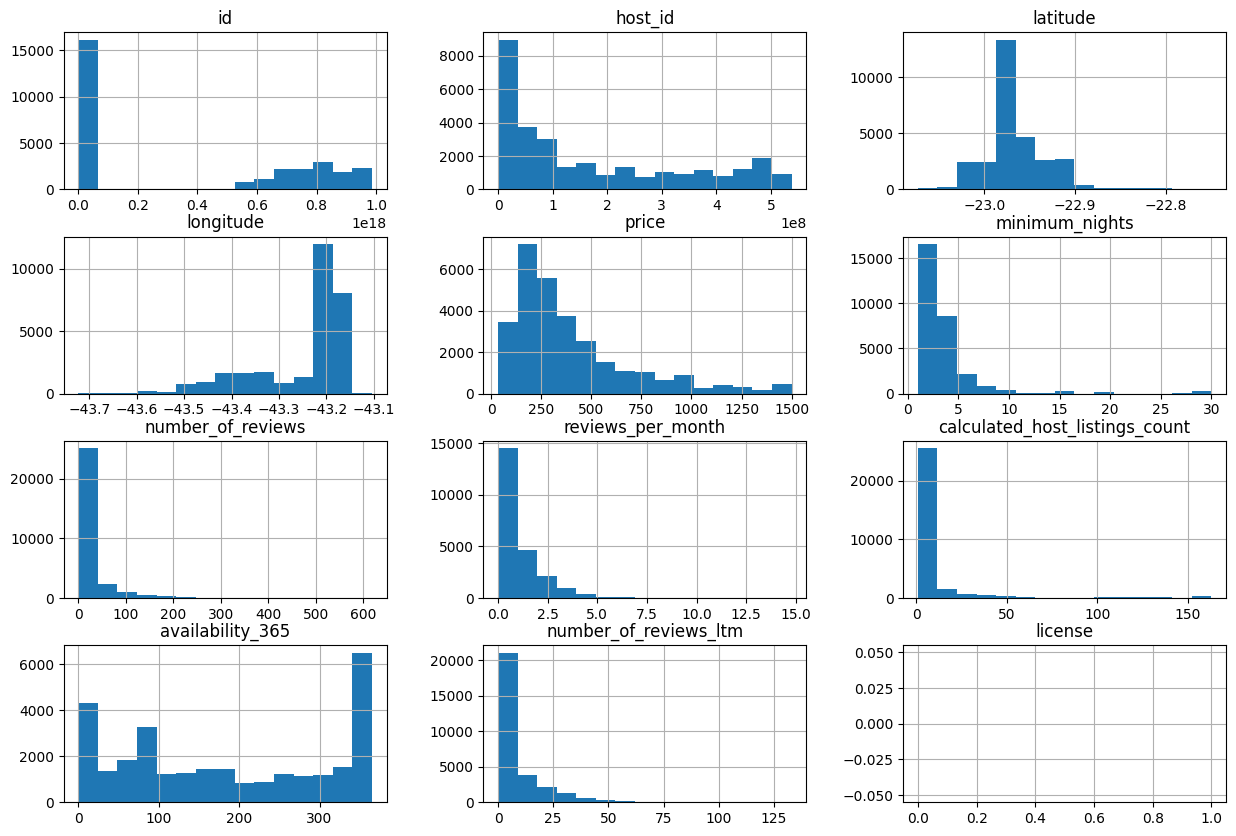

In [19]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [22]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.108929,-0.143431,-0.177535,0.088686,0.086641
minimum_nights,0.108929,1.000000,-0.067872,-0.152060,-0.021993,-0.063076
number_of_reviews,-0.143431,-0.067872,1.000000,0.465979,-0.031585,-0.107215
reviews_per_month,-0.177535,-0.152060,0.465979,1.000000,0.005172,-0.097393
calculated_host_listings_count,0.088686,-0.021993,-0.031585,0.005172,1.000000,0.030240
availability_365,0.086641,-0.063076,-0.107215,-0.097393,0.030240,1.000000


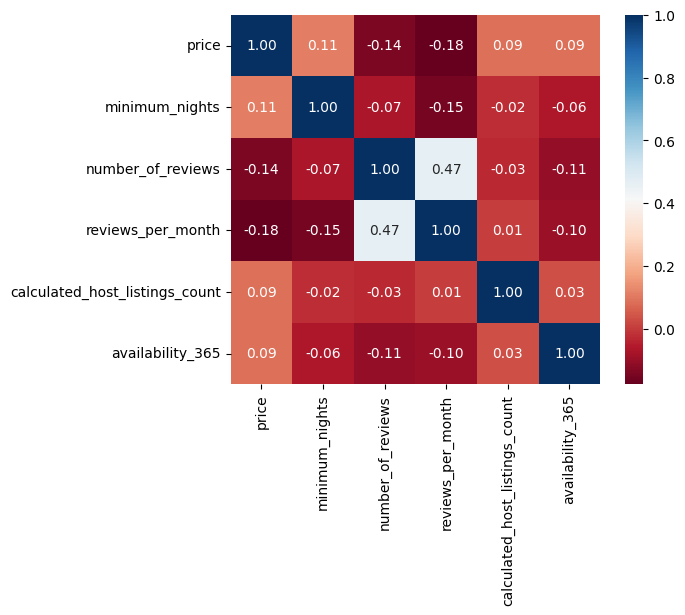

In [23]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [24]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22565
Private room        6293
Shared room          558
Hotel room            42
Name: room_type, dtype: int64

In [39]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    76.600584
Private room       21.362618
Shared room         1.894222
Hotel room          0.142576
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [43]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Complexo do Alemão    900.000000
Engenho da Rainha     799.500000
Caju                  700.000000
Joá                   658.023256
São Conrado           655.573840
Praia da Bandeira     600.000000
Leblon                564.988831
Lagoa                 540.075117
Ipanema               525.053655
Alto da Boa Vista     523.312500
Name: price, dtype: float64

Acima, vemos que a comunidade Complexo do Alemão está com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Complexo do Alemão.

In [49]:
# ver quantidade de imóveis no Complexo do Alemão
print('Entradsa: ', df[df.neighbourhood == "Complexo do Alemão"].shape)
print('\n\n')

# ver as 4 entradas do Complexo do Alemão
df[df.neighbourhood == "Complexo do Alemão"]

Entradsa:  (1, 18)





,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7887,21448656,Home in Rio de Janeiro · 1 bedroom · 1 bed · 1...,155642978,Felipe,NaN,Complexo do Alemão,-22.85998,-43.27476,Shared room,900,1,1,2017-11-28,0.01,1,365,0,NaN


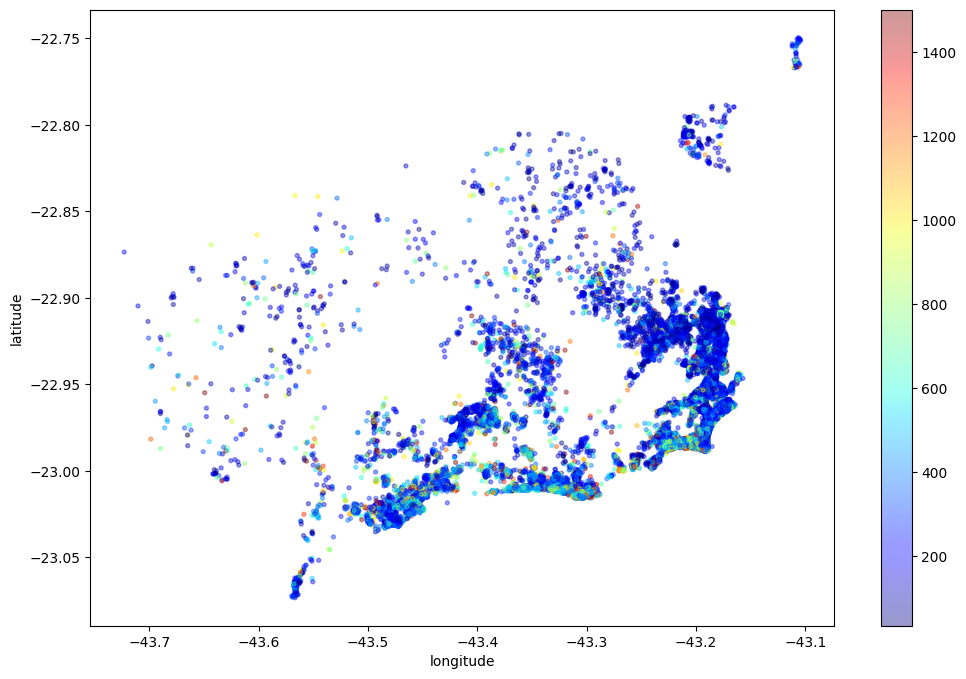

In [50]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [51]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

4.740395444875485

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em variás das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.